In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
attr_names = [
    'chk_acc',
    'duration',
    'credit_his',
    'purpose',
    'amount',
    'saving_acc',
    'present_employment',
    'installment_rate',
    'sex_and_marital',
    'other_debtors',
    'present_resid',
    'property',
    'age',
    'other_install',
    'housing',
    'num_credits',
    'job',
    'num_ppl',
    'tel',
    'is_foreign',
    'y'
]

nominal_attr = [
    'chk_acc',
    'purpose',
    'present_employment',
    'other_debtors',
    'other_install',
    'job',
    'is_foreign',
    'credit_his',
    'saving_acc',
    'sex_and_marital',
    'property',
    'housing',
    'tel'
]

ordinal_attr = [
    'installment_rate',
    'num_credits',
    'num_ppl',
    'present_resid'
]

df = pd.read_csv('data/german.data',
                        header=None,
                        delim_whitespace=True)

df.columns = attr_names

In [3]:
df

,chk_acc,duration,credit_his,purpose,amount,saving_acc,present_employment,installment_rate,sex_and_marital,other_debtors,...,property,age,other_install,housing,num_credits,job,num_ppl,tel,is_foreign,y
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,2


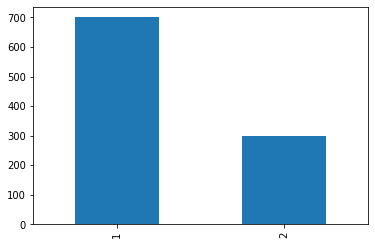

In [4]:
df.y.value_counts().plot(kind='bar')

## Cost matrix

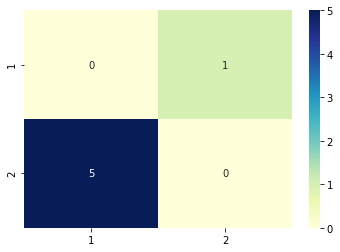

In [5]:
cost_matrix = pd.DataFrame({'1':[0, 5], '2':[1, 0]})
cost_matrix.index += 1
sn.heatmap(cost_matrix, annot=True, cmap="YlGnBu")

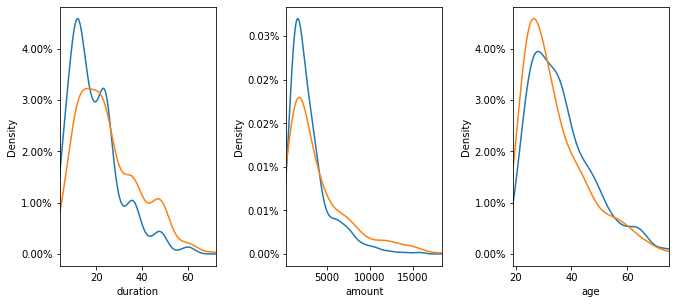

In [6]:
fig, ax = plt.subplots(ncols=3, figsize=(10, 5))
plt.tight_layout(pad=4)

df.loc[df.y == 1].duration.plot.kde(ax=ax[0])
df.loc[df.y == 2].duration.plot.kde(ax=ax[0])
ax[0].set_xlim(df.duration.min(), df.duration.max())
ax[0].set_xlabel("duration")


df.loc[df.y == 1].amount.plot.kde(ax=ax[1])
df.loc[df.y == 2].amount.plot.kde(ax=ax[1])
ax[1].set_xlim(df.amount.min(), df.amount.max())
ax[1].set_xlabel("amount")


df.loc[df.y == 1].age.plot.kde(ax=ax[2])
df.loc[df.y == 2].age.plot.kde(ax=ax[2])
ax[2].set_xlim(df.age.min(), df.age.max())
ax[2].set_xlabel("age")


for axes in ax:
    vals = axes.get_yticks()
    axes.set_yticklabels(['{:.2%}'.format(x) for x in vals])

In [7]:
def plot_stack_y(col, ax):
    grouped = df.groupby(['y', col])\
                .size()\
                .unstack()
    percentage = grouped.apply(lambda x: x / x.sum()).T
    percentage.plot(kind='bar', stacked=True, ax=ax, width=0.9, rot=0, colormap='tab10')\
              .legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

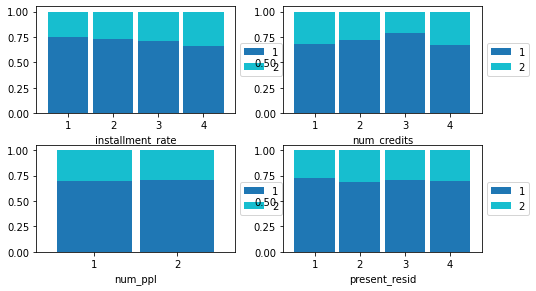

In [8]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(7, 4))
plt.tight_layout()

plot_stack_y('installment_rate', ax[0, 0])
plot_stack_y('num_credits', ax[0, 1])
plot_stack_y('num_ppl', ax[1, 0])
plot_stack_y('present_resid', ax[1, 1])

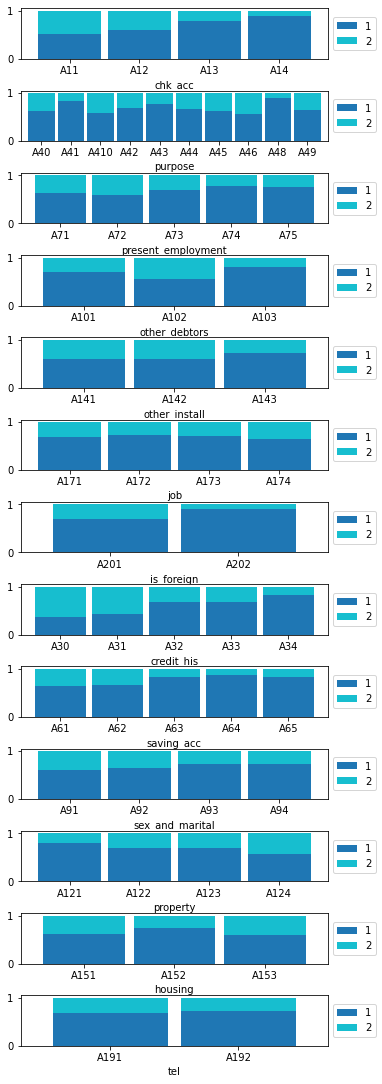

In [9]:
fig, ax = plt.subplots(nrows=13, figsize=(5, 15))
plt.tight_layout()

for i, attr in enumerate(nominal_attr):
    plot_stack_y(attr, ax[i])

## Data preprocessing (using all features)

Our data has large number of nominal attributes. We have to process our nominal attributes in to numerical format so it can be use by the model.

There are many ways of converting nominal into numerical value the most common one is one-hot encoding. However one-hot encoding create will create a new column per level of categorical attribute and might heavily effect the performance of Decision tree. Label encoding is use for previously stated reason.

In [10]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Encode
lb = preprocessing.LabelEncoder()
df[nominal_attr] = df[nominal_attr].apply(lb.fit_transform)

# Normalize
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(df)
df = pd.DataFrame(np_scaled, columns=attr_names)

x_train,\
x_test,\
y_train,\
y_test = train_test_split(df.drop(['y'], axis=1), df.y, test_size=0.30)

In [11]:
def modelfit(alg, train, labels):
    alg.fit(train, labels)
    y_pred = alg.predict(x_test)
    
    print(classification_report(y_test, y_pred))
    
    return confusion_matrix(y_test, y_pred)

## Decision Tree

In [12]:
from sklearn.tree import DecisionTreeClassifier

dct_clf = DecisionTreeClassifier()
dcs_tree_cm = modelfit(dct_clf, x_train, y_train)

              precision    recall  f1-score   support

         0.0       0.80      0.82      0.81       213
         1.0       0.53      0.48      0.50        87

    accuracy                           0.72       300
   macro avg       0.66      0.65      0.66       300
weighted avg       0.72      0.72      0.72       300



## Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier

randf_clf = RandomForestClassifier(n_estimators=10, max_features="auto", random_state=0)
rand_forest_cm = modelfit(randf_clf, x_train, y_train)

              precision    recall  f1-score   support

         0.0       0.75      0.94      0.84       213
         1.0       0.62      0.24      0.35        87

    accuracy                           0.74       300
   macro avg       0.68      0.59      0.59       300
weighted avg       0.71      0.74      0.69       300



## Ada Boost

In [14]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(n_estimators=20, learning_rate=0.1)
ada_cm = modelfit(ada_clf, x_train, y_train)

              precision    recall  f1-score   support

         0.0       0.71      1.00      0.83       213
         1.0       0.50      0.01      0.02        87

    accuracy                           0.71       300
   macro avg       0.61      0.50      0.43       300
weighted avg       0.65      0.71      0.60       300



## Gradient Boost

In [15]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=0.1)
gb_cm = modelfit(gb_clf, x_train, y_train)

              precision    recall  f1-score   support

         0.0       0.77      0.95      0.85       213
         1.0       0.71      0.31      0.43        87

    accuracy                           0.76       300
   macro avg       0.74      0.63      0.64       300
weighted avg       0.75      0.76      0.73       300



## XGBoost

In [16]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(n_estimators=20, learning_rate=0.1)
xgb_cm = modelfit(xgb_clf, x_train, y_train)

              precision    recall  f1-score   support

         0.0       0.78      0.90      0.84       213
         1.0       0.61      0.39      0.48        87

    accuracy                           0.75       300
   macro avg       0.69      0.64      0.66       300
weighted avg       0.73      0.75      0.73       300



## Support Vector Machine

In [17]:
from sklearn.svm import SVC

svm_clf = SVC(kernel='linear')
svm_clf.fit(x_train,y_train)
y_pred = svm_clf.predict(x_test)
print(classification_report(y_test, y_pred))

svm_cm = confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

         0.0       0.79      0.85      0.82       213
         1.0       0.54      0.44      0.48        87

    accuracy                           0.73       300
   macro avg       0.66      0.64      0.65       300
weighted avg       0.72      0.73      0.72       300



## Feed Forward Neural Network

In [18]:
from tensorflow import keras

model = keras.Sequential()

model.add(keras.layers.Dense(64, activation='relu', input_shape=(20,)))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(2, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1344      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 130       
Total params: 5,634
Trainable params: 5,634
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(optimizer='adam',
                loss=keras.losses.sparse_categorical_crossentropy,
                metrics=['accuracy'])

model.fit(x=x_train,
          y=y_train,
          epochs=20)

Train on 700 samples
Epoch 1/20
700/700 [==============================] - 2s 3ms/sample - loss: 0.5922 - accuracy: 0.6957
Epoch 2/20
700/700 [==============================] - 0s 514us/sample - loss: 0.5540 - accuracy: 0.6971
Epoch 3/20
700/700 [==============================] - 0s 666us/sample - loss: 0.5275 - accuracy: 0.7171
Epoch 4/20
700/700 [==============================] - 0s 611us/sample - loss: 0.5004 - accuracy: 0.7629
Epoch 5/20
700/700 [==============================] - 0s 555us/sample - loss: 0.4816 - accuracy: 0.7714
Epoch 6/20
700/700 [==============================] - 0s 545us/sample - loss: 0.4673 - accuracy: 0.7800
Epoch 7/20
700/700 [==============================] - 0s 474us/sample - loss: 0.4598 - accuracy: 0.7857
Epoch 8/20
700/700 [==============================] - 0s 690us/sample - loss: 0.4518 - accuracy: 0.7843
Epoch 9/20
700/700 [==============================] - 0s 452us/sample - loss: 0.4439 - accuracy: 0.7900
Epoch 10/20
700/700 [========================

In [20]:
y_pred = model.predict(x_test)

nn_cm = confusion_matrix(y_test, y_pred.argmax(axis=1))
model.evaluate(x_test, y_test)

300/300 [==============================] - 0s 410us/sample - loss: 0.5282 - accuracy: 0.7133


[0.5281990512212118, 0.7133333]

## Confusion Matrices Comparison

In [21]:
def cost(cf_matrix):
    return (cf_matrix * cost_matrix).sum().sum()

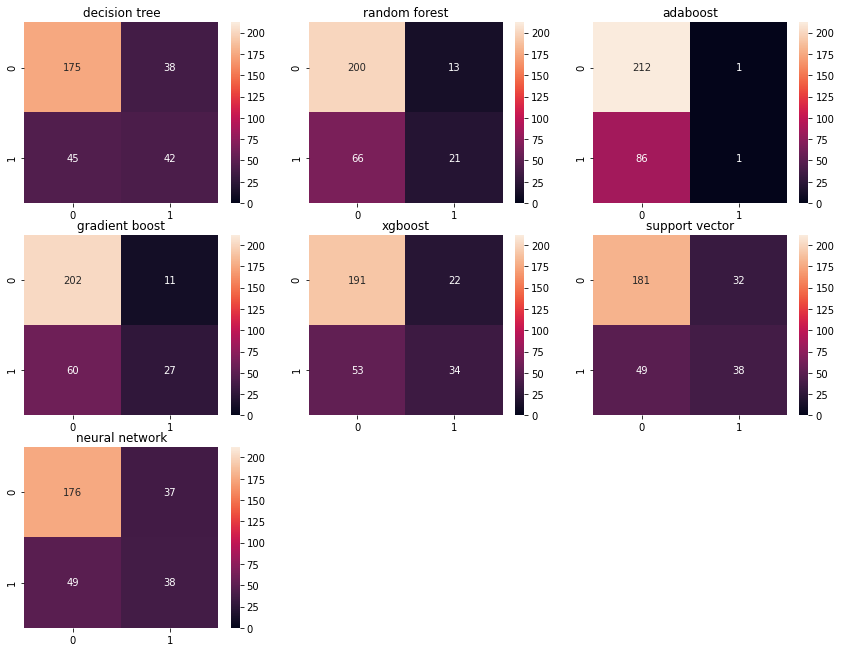

In [22]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(12, 9))
plt.tight_layout()

cms = [
    dcs_tree_cm,
    rand_forest_cm,
    ada_cm,
    gb_cm,
    xgb_cm,
    svm_cm,
    nn_cm
]

cm_names = [
    'decision tree',
    'random forest',
    'adaboost',
    'gradient boost',
    'xgboost',
    'support vector',
    'neural network'
]

max_pred = 0
for cm in cms:
    if cm.max() > max_pred:
        max_pred = cm.max()
        
ax[2, 1].axis('off')
ax[2, 2].axis('off')

for i, ax in enumerate(ax.flatten()[:-2]):
    sn.heatmap(cms[i], annot=True, ax=ax, fmt='1', vmin=0, vmax=max_pred).set_title(cm_names[i])

Accuracy decision tree	: 0.72
Accuracy random forest	: 0.74
Accuracy adaboost	: 0.71
Accuracy gradient boost	: 0.76
Accuracy xgboost	: 0.75
Accuracy support vector	: 0.73
Accuracy neural network	: 0.71


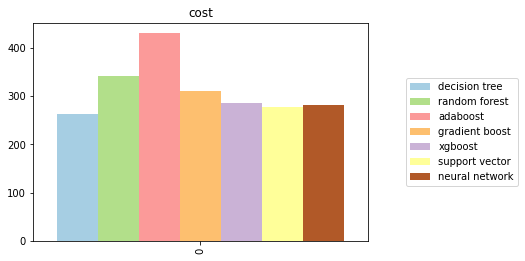

In [23]:
cost_full = [[
    cost(dcs_tree_cm),
    cost(rand_forest_cm),
    cost(ada_cm),
    cost(gb_cm),
    cost(xgb_cm),
    cost(svm_cm),
    cost(nn_cm)
]]

accuracy = [(cm[0, 0] + cm[1, 1]) / 300 for i, cm in enumerate(cms)]

for i, acc in enumerate(accuracy):
    print('Accuracy {}\t: {:.2g}'.format(cm_names[i], acc))

pd.DataFrame(cost_full, columns=cm_names).plot(kind='bar', width=3, title='cost', colormap='Paired')\
    .legend(loc='center left', bbox_to_anchor=(1.1, 0.5))\

## Visualization of Feature Importance using Chi-square test

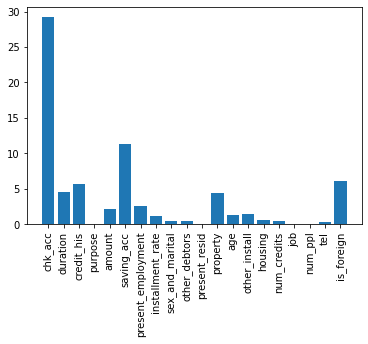

In [24]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


fs = SelectKBest(score_func=chi2, k='all')

sum_fs = np.array([0.0]*20)
for i in range(100):
    sum_fs += fs.fit(x_train, y_train).scores_
    
avg_fs = sum_fs / 100
plt.bar([attr_names[i] for i in range(len(avg_fs))], avg_fs)
plt.xticks(rotation=90)
plt.show()

In [25]:
def select_features(x_train, y_train, x_test):
    fs = SelectKBest(score_func=chi2, k=8)
    
    sum_fs = np.array([0.0]*20)
    for i in range(100):
        sum_fs += fs.fit(x_train, y_train).scores_
    
    avg_fs = sum_fs / 100
    fs.fit(x_train, y_train)
    x_train_fs = fs.transform(x_train)
    x_test_fs = fs.transform(x_test)
    return x_train_fs, x_test_fs


x_train, x_test = select_features(x_train, y_train, x_test)

## Decesion Tree (reduced dimensions)

In [26]:
dcs_tree_cm = modelfit(dct_clf, x_train, y_train)

              precision    recall  f1-score   support

         0.0       0.81      0.78      0.79       213
         1.0       0.50      0.54      0.52        87

    accuracy                           0.71       300
   macro avg       0.65      0.66      0.66       300
weighted avg       0.72      0.71      0.71       300



## Random Forest (reduced dimensions)

In [27]:
rand_forest_cm = modelfit(randf_clf, x_train, y_train)

              precision    recall  f1-score   support

         0.0       0.78      0.92      0.85       213
         1.0       0.67      0.37      0.47        87

    accuracy                           0.76       300
   macro avg       0.72      0.65      0.66       300
weighted avg       0.75      0.76      0.74       300



## Adaboost (reduced dimensions)

In [28]:
ada_cm = modelfit(ada_clf, x_train, y_train)

              precision    recall  f1-score   support

         0.0       0.71      1.00      0.83       213
         1.0       0.50      0.01      0.02        87

    accuracy                           0.71       300
   macro avg       0.61      0.50      0.43       300
weighted avg       0.65      0.71      0.60       300



## Gradient Boost (reduced dimensions)

In [29]:
gb_cm = modelfit(gb_clf, x_train, y_train)

              precision    recall  f1-score   support

         0.0       0.78      0.94      0.85       213
         1.0       0.70      0.34      0.46        87

    accuracy                           0.77       300
   macro avg       0.74      0.64      0.66       300
weighted avg       0.75      0.77      0.74       300



## XGBoost (reduced dimensions)

In [30]:
xgb_cm = modelfit(xgb_clf, x_train, y_train)

              precision    recall  f1-score   support

         0.0       0.80      0.89      0.84       213
         1.0       0.62      0.45      0.52        87

    accuracy                           0.76       300
   macro avg       0.71      0.67      0.68       300
weighted avg       0.75      0.76      0.75       300



In [31]:
model = keras.Sequential()

model.add(keras.layers.Dense(64, activation='relu', input_shape=(8,)))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(2, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                576       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 130       
Total params: 4,866
Trainable params: 4,866
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.compile(optimizer='adam',
                loss=keras.losses.sparse_categorical_crossentropy,
                metrics=['accuracy'])

model.fit(x=x_train,
          y=y_train,
          epochs=20)

y_pred = model.predict(x_test)

nn_cm = confusion_matrix(y_test, y_pred.argmax(axis=1))
model.evaluate(x_test, y_test)

Train on 700 samples
Epoch 1/20
700/700 [==============================] - 1s 1ms/sample - loss: 0.5881 - accuracy: 0.6957
Epoch 2/20
700/700 [==============================] - 0s 564us/sample - loss: 0.5466 - accuracy: 0.7000
Epoch 3/20
700/700 [==============================] - 0s 476us/sample - loss: 0.5169 - accuracy: 0.7400
Epoch 4/20
700/700 [==============================] - 0s 549us/sample - loss: 0.4996 - accuracy: 0.7529
Epoch 5/20
700/700 [==============================] - 0s 498us/sample - loss: 0.4933 - accuracy: 0.7543
Epoch 6/20
700/700 [==============================] - 0s 553us/sample - loss: 0.4882 - accuracy: 0.7586
Epoch 7/20
700/700 [==============================] - 0s 567us/sample - loss: 0.4831 - accuracy: 0.7657
Epoch 8/20
700/700 [==============================] - 0s 568us/sample - loss: 0.4895 - accuracy: 0.7657
Epoch 9/20
700/700 [==============================] - 0s 478us/sample - loss: 0.4817 - accuracy: 0.7743
Epoch 10/20
700/700 [========================

[0.5385002533594767, 0.75]

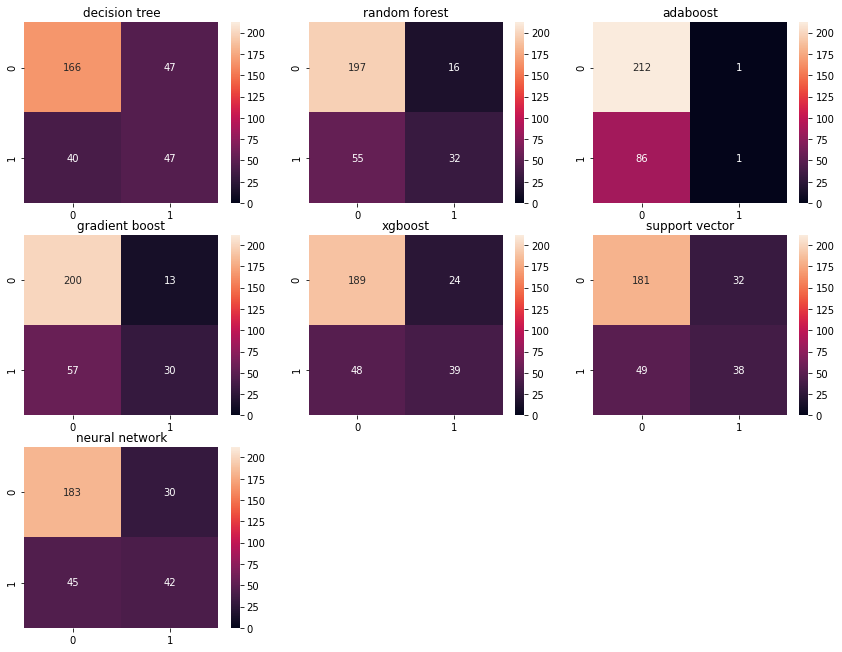

In [33]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(12, 9))
plt.tight_layout()

cms = [
    dcs_tree_cm,
    rand_forest_cm,
    ada_cm,
    gb_cm,
    xgb_cm,
    svm_cm,
    nn_cm
]

max_pred = 0
for cm in cms:
    if cm.max() > max_pred:
        max_pred = cm.max()
        
ax[2, 1].axis('off')
ax[2, 2].axis('off')

for i, ax in enumerate(ax.flatten()[:-2]):
    sn.heatmap(cms[i], annot=True, ax=ax, fmt='1', vmin=0, vmax=max_pred).set_title(cm_names[i])

Accuracy decision tree	: 0.71
Accuracy random forest	: 0.76
Accuracy adaboost	: 0.71
Accuracy gradient boost	: 0.77
Accuracy xgboost	: 0.76
Accuracy support vector	: 0.73
Accuracy neural network	: 0.75


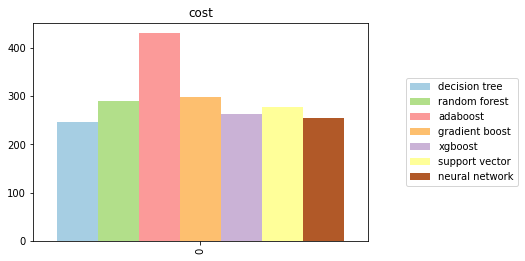

In [34]:
cost_reduced = [[
    cost(dcs_tree_cm),
    cost(rand_forest_cm),
    cost(ada_cm),
    cost(gb_cm),
    cost(xgb_cm),
    cost(svm_cm),
    cost(nn_cm)
]]

accuracy_reduced = [(cm[0, 0] + cm[1, 1]) / 300 for i, cm in enumerate(cms)]

for i, acc in enumerate(accuracy_reduced):
    print('Accuracy {}\t: {:.2g}'.format(cm_names[i], acc))

pd.DataFrame(cost_reduced, columns=cm_names).plot(kind='bar', width=3, title='cost', colormap='Paired')\
    .legend(loc='center left', bbox_to_anchor=(1.1, 0.5))\

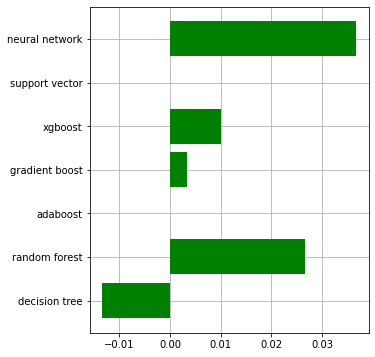

In [35]:
fig, ax = plt.subplots(figsize=(5, 6))
diff = np.array(accuracy_reduced) - np.array(accuracy)

plt.barh(cm_names,
        diff,
        color='green',
        zorder=3)
plt.grid(zorder=0)

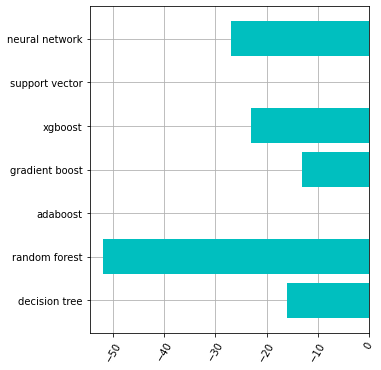

In [36]:
fig, ax = plt.subplots(figsize=(5, 6))
diff = np.array(cost_reduced[0]) - np.array(cost_full[0])
plt.barh(cm_names,
        diff,
        color='c',
        zorder=3)
plt.xticks(rotation=60)
plt.grid(zorder=0)